In [1]:
### import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from utils import seir, seir_ivp, run_modified_seir
from plot import plot_timeseries

# Time-Series Plots

Here we generate time-series plots using a specific $R_0$ value and vaccine efficacy, to model and compare the population dynamics of the two modes of vaccine failure - 'leaky' and 'all-or-nothing'. The following 9 regimes governed by the timing and maximum coverage of vaccination were investigated:
- Vaccine administered at 0% epidemic size, covering $f_{V, \text{ Below}}$ of population
- Vaccine administered at 0% dpidemic size, covering $f_{V, \text{ Slightly Above}}$ of population
- Vaccine administered at 0% epidemic size, covering $f_{V, \text{ Above}}$ of population
- Vaccine administered at 10% epidemic size, covering $f_{V, \text{ Below}}$ of population
- Vaccine administered at 10% epidemic size, covering $f_{V, \text{ Slightly Above}}$ of population
- Vaccine administered at 10% epidemic size, covering $f_{V, \text{ Above}}$ of population
- Vaccine administered at 25% epidemic size, covering $f_{V, \text{ Below}}$ of population
- Vaccine administered at 25% epidemic size, covering $f_{V, \text{ Slightly Above}}$ of population
- Vaccine administered at 25% epidemic size, covering $f_{V, \text{ Above}}$ of population

Recall that $f^*_V$ represents the critical vaccination threshold and is defined as: 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0}) $$

for instantaneous vaccination before the epidemic starts, and 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0(1 - f_R)})$$

for instantaneous vaccination after the epidemic starts. 

Also recall that the three different vaccine coverage levels are defined by
$$ f_{V, \text{ Below}} = 0.8f^*_V $$
$$ f_{V, \text{ Slightly above}} =  1 - 0.8(1 - f^*_V) $$
$$ f_{V, \text{ Above}} = 1 - 0.5(1 - f^*_V) $$

For the following plots, let $R_0= 2.5$ and ($\epsilon_L, \epsilon_A$) = (0.6, 1) for a leaky vaccine or ($\epsilon_L, \epsilon_A$) = (1, 0.6) for an all-or-nothing vaccine. The simulation was run for 200 days with the following parameter values and initial conditions: $\beta = 2.5/4$, $\gamma = 1/4$, $\sigma=1/4$, $S(0) = 0.98$ $E(0) = 0.01$, $I(0) = 0.01$, $R(0) = 0$.

The figure used in the paper is the last figure of this notebook, where we compare 

## Vaccine Administered at 0% Epidemic Size

In [2]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6; fc = 1/eps * (1 - 1/2.5)
t = 200; tv = -1

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, np.linspace(0, t, t+1), args=(beta, sigma, gamma))
sim = sim.T

### Covering $f_{V, \text{ Below}}$ of Population

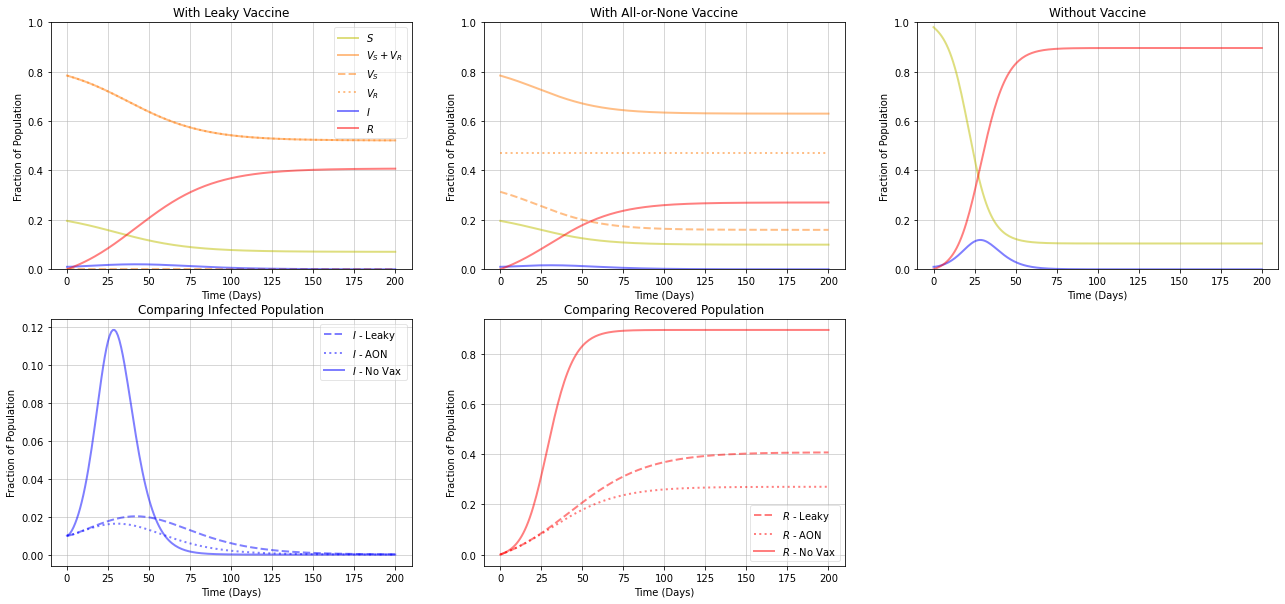

In [3]:
### run model
# set parameters
t = 200; fv = fc * 0.8

# leaky
sim_leaky_0_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_0_below, sim_aon_0_below, savefig=False, filename='timeseries_pre_below')

### Covering $f_{V, \text{ Slightly Above}}$ of Population

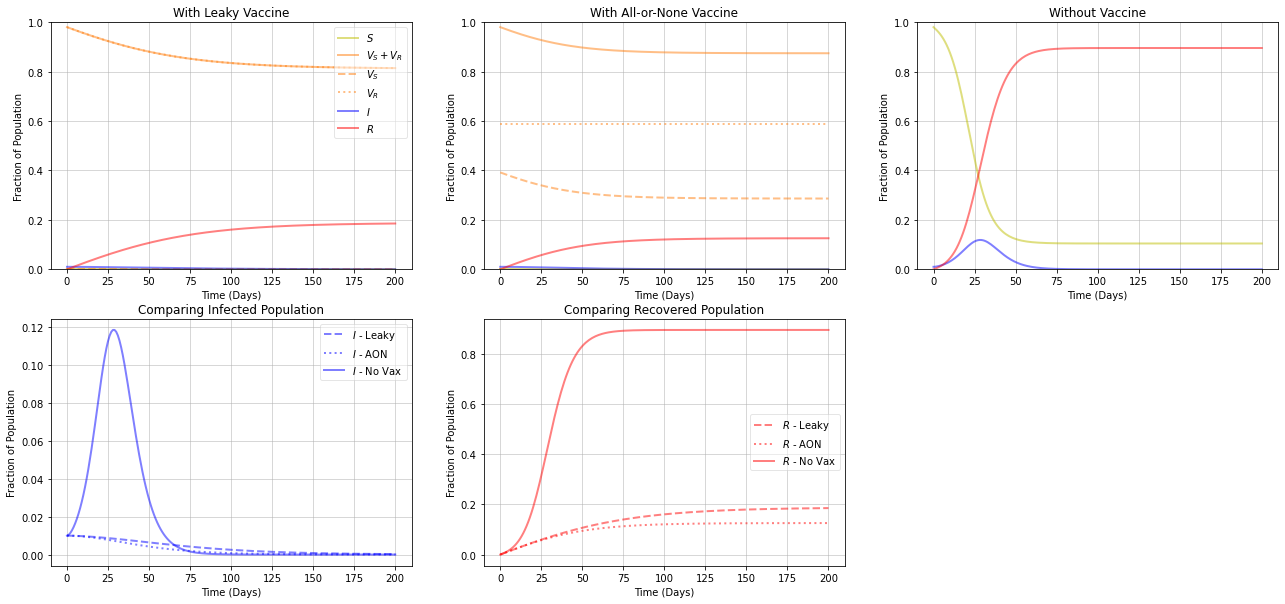

In [4]:
### run model
# set parameters
t = 200; fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky_0_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_0_slabove, sim_aon_0_slabove, savefig=False, filename='timeseries_pre_slabove')

### Covering $f_{V, \text{ Above}}$ of Population

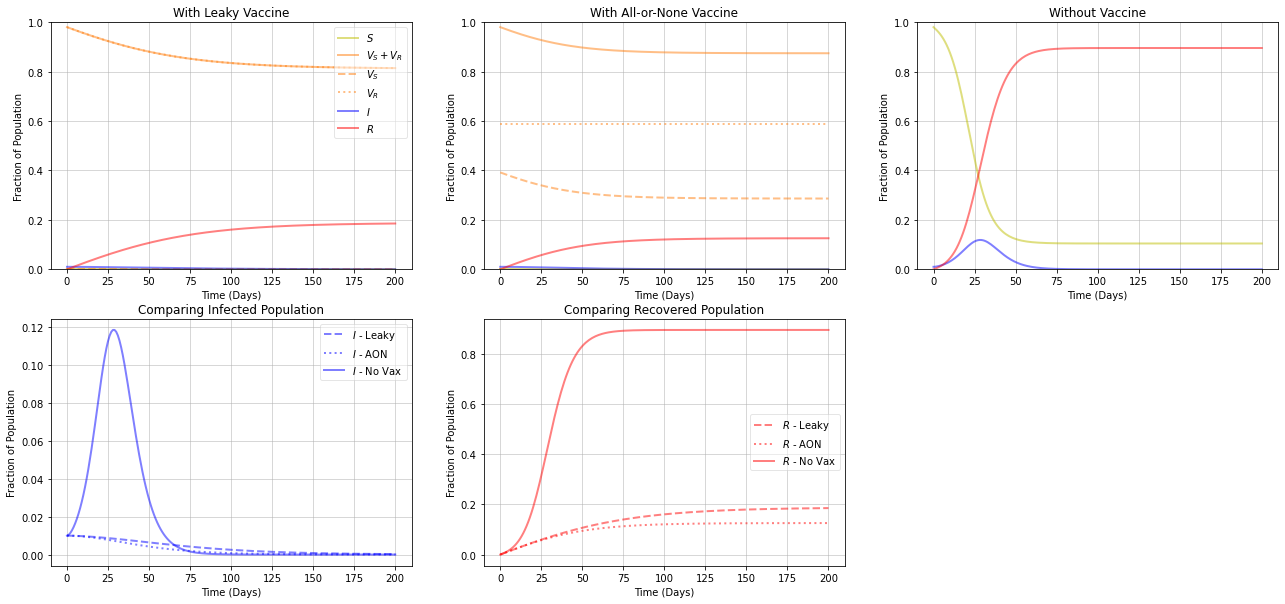

In [5]:
### run model
# set parameters
t = 200; fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky_0_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_0_above, sim_aon_0_above, savefig=False, filename='timeseries_pre_above')

## Vaccine Administered at 10% Epidemic Size

In [4]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6
t = 200

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, np.linspace(0, t, t+1), args=(beta, sigma, gamma))
sim = sim.T

# set fc
def _reach_size10(t, y, beta, sigma, gamma): return y[3] - 0.1
_reach_size10.terminate=True

sol = solve_ivp(seir_ivp, [0, t], y0, args=(beta, sigma, gamma), events=_reach_size10, dense_output=True)
s_temp = np.ravel(np.array(sol.y_events[0]))[0]
print(sol.y_events)
tv = int(np.round(np.ravel(np.array(sol.t_events))[0]))
fc = 1/eps * (1 - 1/(2.5*s_temp))
print(fc)

### change in R is probably very subtle - I at time of vacacination is 0.0566

[array([[0.76322863, 0.08014746, 0.05662391, 0.1       ]])]
0.793184411978362


### Covering $f_{V, \text{ Below}}$ of Population

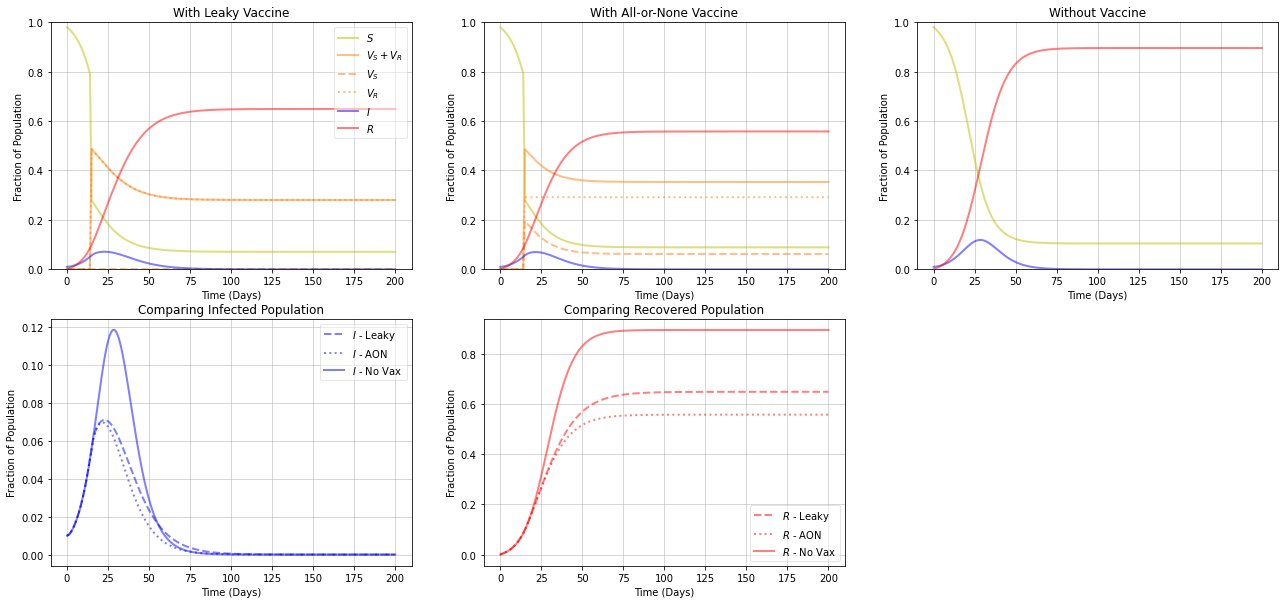

In [7]:
### run model
# set parameters
fv = fc * 0.8

# leaky
sim_leaky_10_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_10_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_10_below, sim_aon_10_below, savefig=False, filename='timeseries_post10_below')

### Covering $f_{V, \text{ Slightly Above}}$ of Population

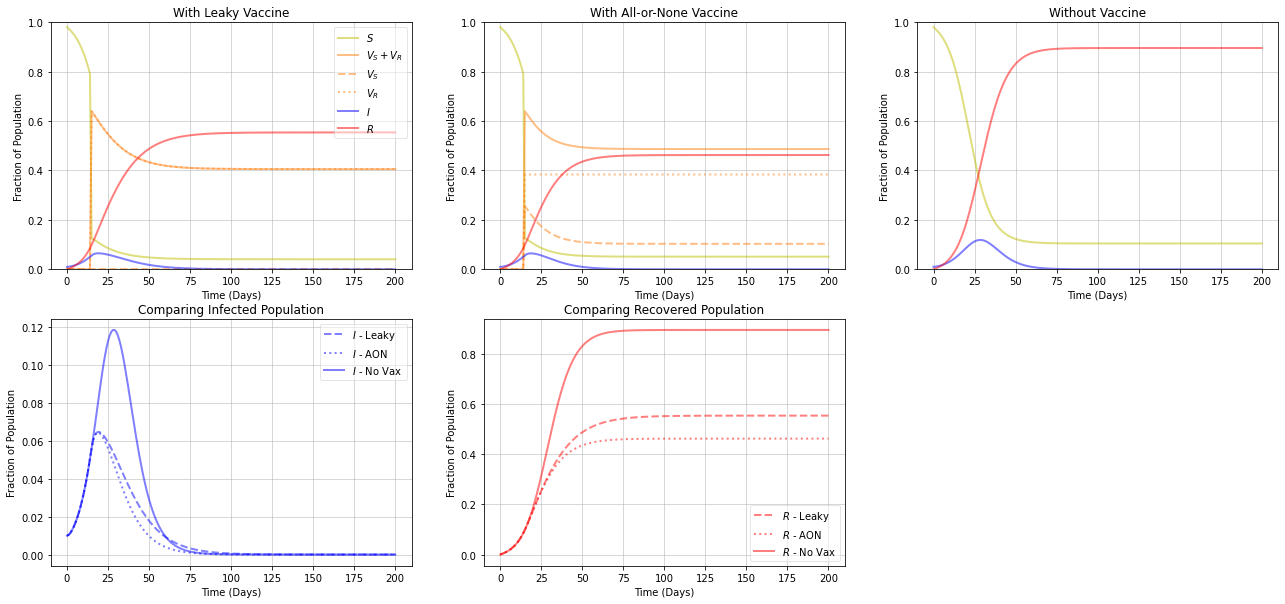

In [8]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky_10_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_10_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_10_slabove, sim_aon_10_slabove, savefig=False, filename='timeseries_post10_below')

### Covering $f_{V, \text{ Above}}$ of Population

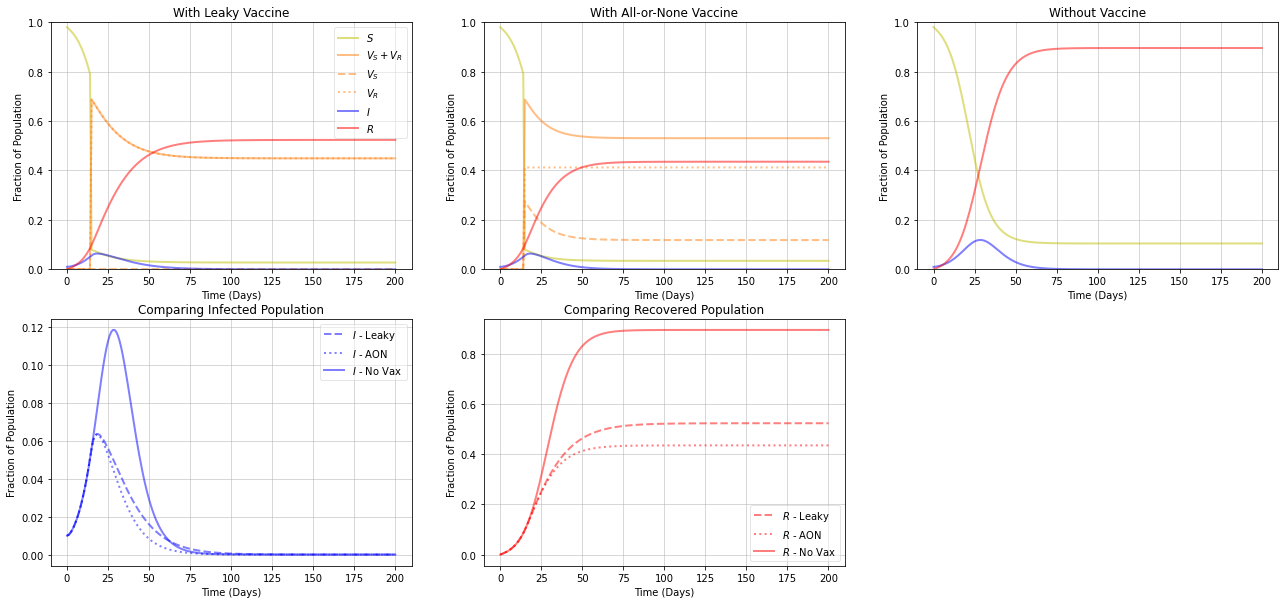

In [9]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky_10_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_10_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_10_above, sim_aon_10_above, savefig=False, filename='timeseries_post10_below')

## Vaccine Administered at 25% Epidemic Size

In [3]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6
t = 200

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, np.linspace(0, t, t+1), args=(beta, sigma, gamma))
sim = sim.T

# set fc
def _reach_size25(t, y, beta, sigma, gamma): return y[3] - 0.25
_reach_size25.terminate=True

sol = solve_ivp(seir_ivp, [0, t], y0, args=(beta, sigma, gamma), events=_reach_size25, dense_output=True)
s_temp = np.ravel(np.array(sol.y_events[0]))[0]
tv = int(np.round(np.ravel(np.array(sol.t_events))[0]))
fc = 1/eps * (1 - 1/(2.5*s_temp))

### Covering $f_{V, \text{ Below}}$ of Population

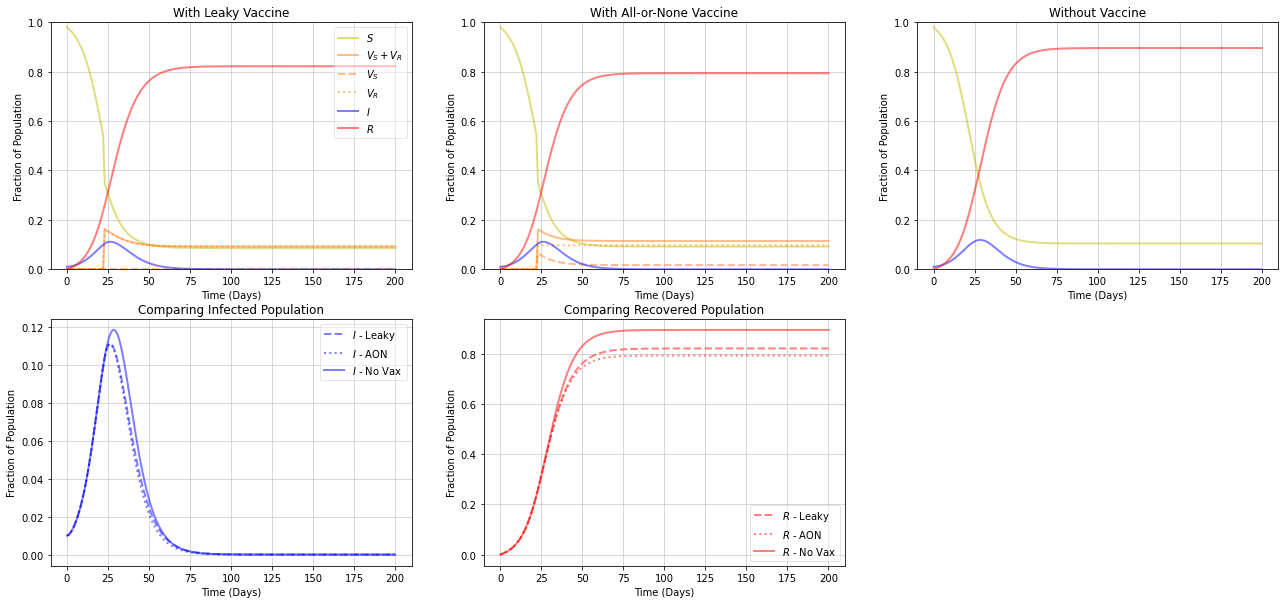

In [4]:
### run model
# set parameters
fv = fc* 0.8

# leaky
sim_leaky_25_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_25_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_25_below, sim_aon_25_below, savefig=False, filename='timeseries_post10_below')

### Covering $f_{V, \text{ Slightly Above}}$ of Population

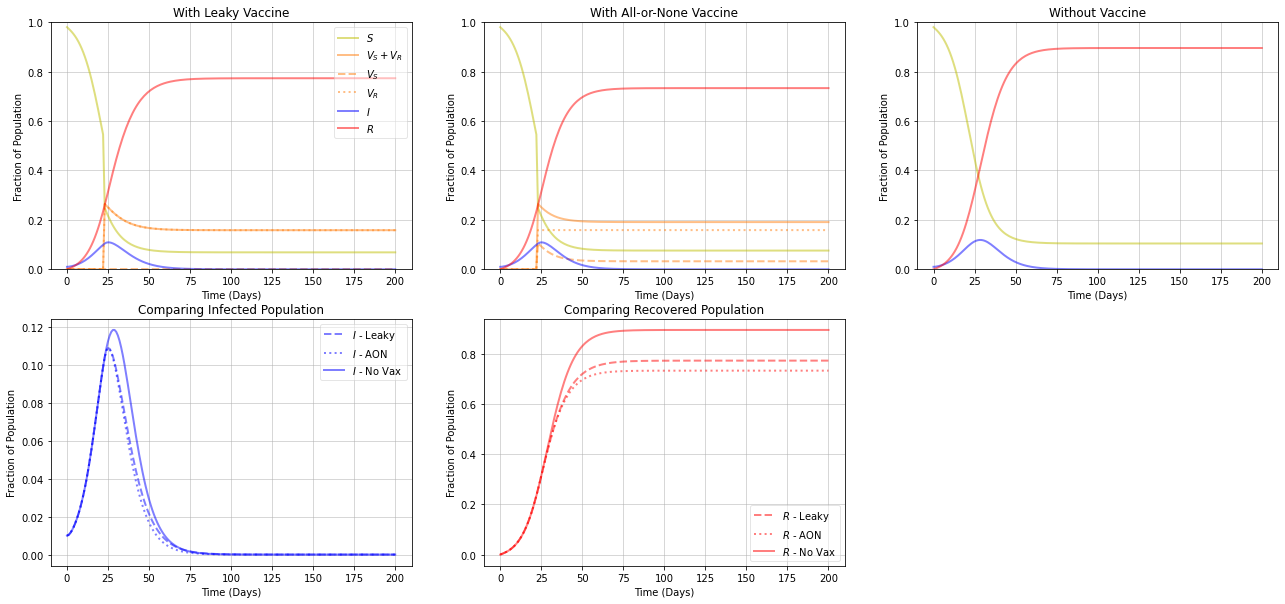

In [5]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky_25_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_25_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_25_slabove, sim_aon_25_slabove, savefig=False, filename='timeseries_post10_below')

### Covering $f_{V, \text{ Above}}$ of Population

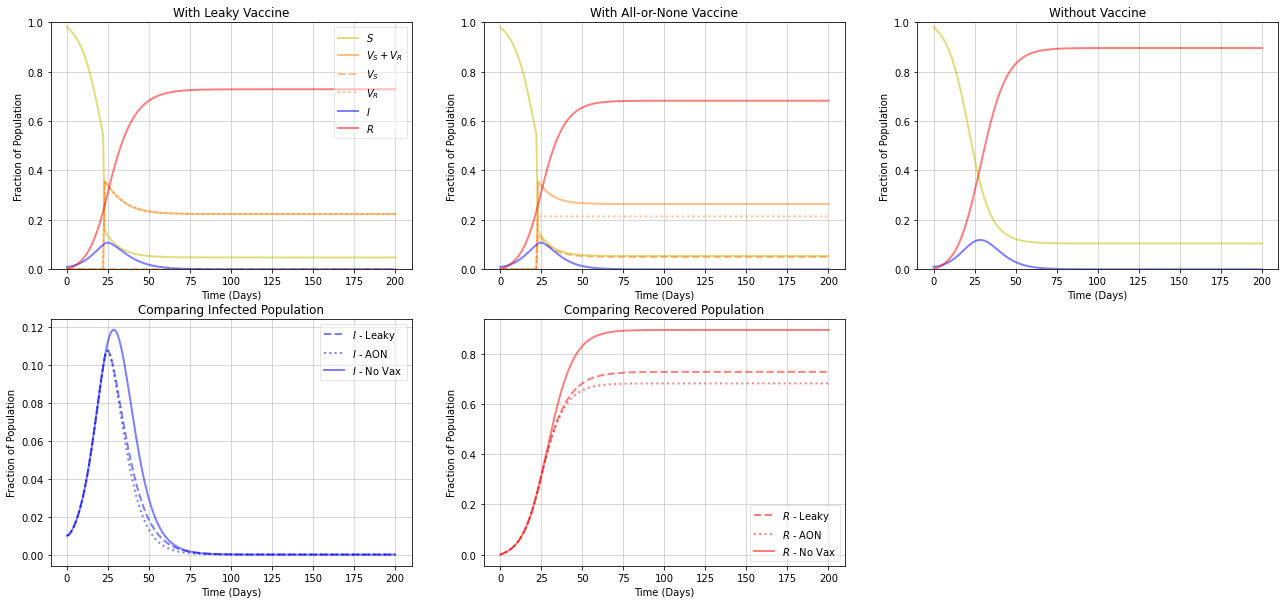

In [6]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky_25_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_25_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_25_above, sim_aon_25_above, savefig=False, filename='timeseries_post10_below')

## Summary

To compare the differences more effectively, below is a figure that follows the dynamics of just the recovered population over time for each regime.

In [14]:
# collect recovered population data from all dataframes
_, _, _, _, _, _, r_leaky_0_below = sim_leaky_0_below
_, _, _, _, _, _, r_leaky_0_slabove = sim_leaky_0_slabove
_, _, _, _, _, _, r_leaky_0_above = sim_leaky_0_above

_, _, _, _, _, _, r_leaky_10_below = sim_leaky_10_below
_, _, _, _, _, _, r_leaky_10_slabove = sim_leaky_10_slabove
_, _, _, _, _, _, r_leaky_10_above = sim_leaky_10_above

_, _, _, _, _, _, r_leaky_25_below = sim_leaky_25_below
_, _, _, _, _, _, r_leaky_25_slabove = sim_leaky_25_slabove
_, _, _, _, _, _, r_leaky_25_above = sim_leaky_25_above

_, _, _, _, _, _, r_aon_0_below = sim_aon_0_below
_, _, _, _, _, _, r_aon_0_slabove = sim_aon_0_slabove
_, _, _, _, _, _, r_aon_0_above = sim_aon_0_above

_, _, _, _, _, _, r_aon_10_below = sim_aon_10_below
_, _, _, _, _, _, r_aon_10_slabove = sim_aon_10_slabove
_, _, _, _, _, _, r_aon_10_above = sim_aon_10_above

_, _, _, _, _, _, r_aon_25_below = sim_aon_25_below
_, _, _, _, _, _, r_aon_25_slabove = sim_aon_25_slabove
_, _, _, _, _, _, r_aon_25_above = sim_aon_25_above

_, _, _, r = sim

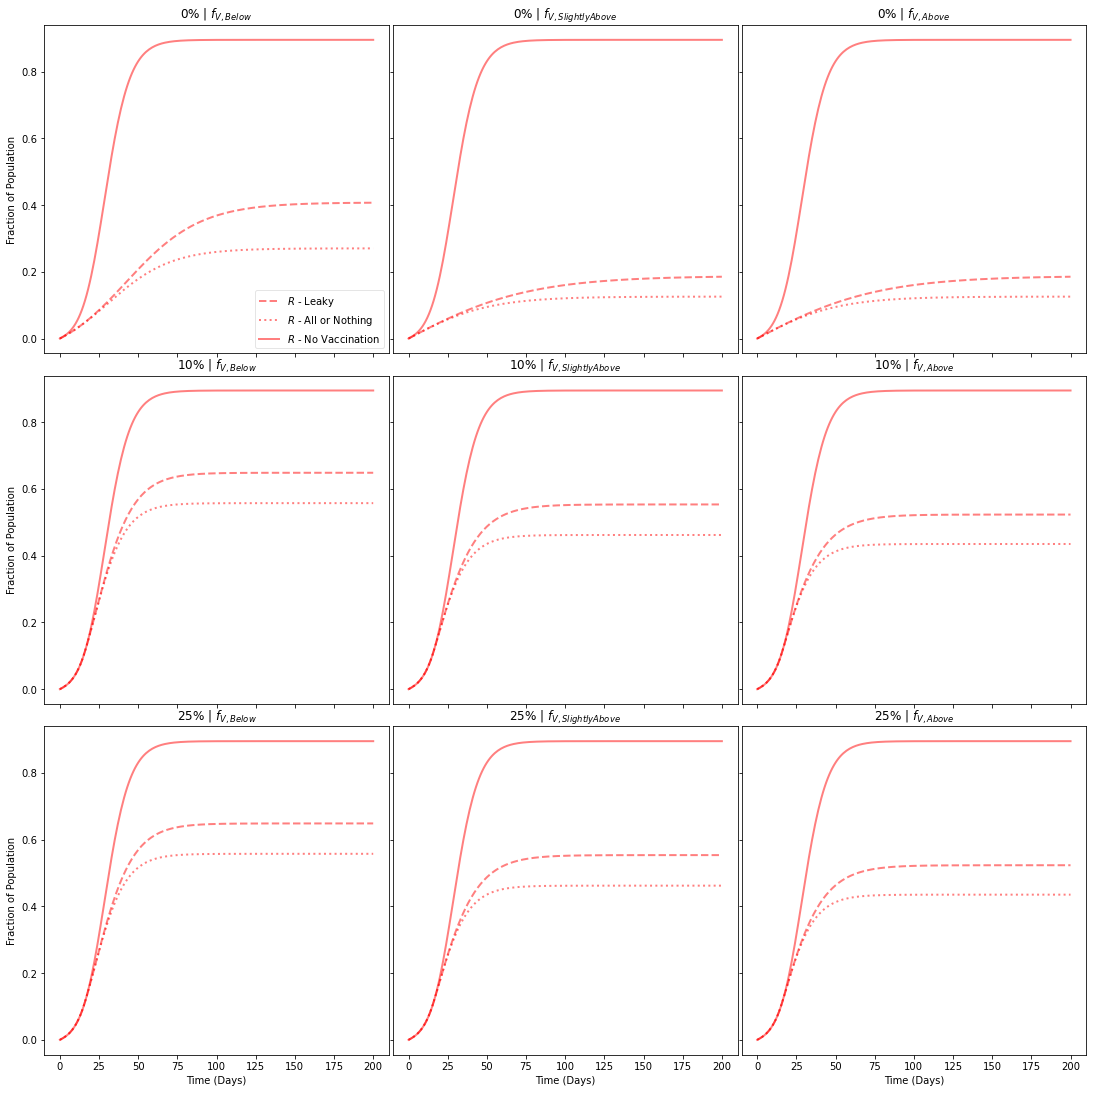

In [15]:
### plot timeseries of recovered population
fig, axes = plt.subplots(3,3, facecolor='w', figsize=(15,15), sharex=True, sharey=True, gridspec_kw=dict(width_ratios=[1,1,1]))
t = np.linspace(0, 200, 201)

# vaccine administered at 0% epidemic size
axes[0,0].plot(t, r_leaky_0_below, 'r--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,0].plot(t, r_aon_0_below, 'r:', alpha=0.5, lw=2, label = "$R$ - All or Nothing")
axes[0,0].plot(t, r, 'r', alpha=0.5, lw=2, label="$R$ - No Vaccination")
axes[0,0].set_title('0% | $f_{V, Below}$')
axes[0,0].set_ylabel('Fraction of Population')
legend = axes[0,0].legend(); legend.get_frame().set_alpha(0.5)

axes[0,1].plot(t, r_leaky_0_slabove, 'r--', alpha=0.5, lw=2)
axes[0,1].plot(t, r_aon_0_slabove, 'r:', alpha=0.5, lw=2)
axes[0,1].plot(t, r, 'r', alpha=0.5, lw=2)
axes[0,1].set_title('0% | $f_{V, Slightly Above}$')

axes[0,2].plot(t, r_leaky_0_above, 'r--', alpha=0.5, lw=2)
axes[0,2].plot(t, r_aon_0_above, 'r:', alpha=0.5, lw=2)
axes[0,2].plot(t, r, 'r', alpha=0.5, lw=2)
axes[0,2].set_title('0% | $f_{V, Above}$')

# vaccine administered at 10% epidemic size
axes[1,0].plot(t, r_leaky_10_below, 'r--', alpha=0.5, lw=2)
axes[1,0].plot(t, r_aon_10_below, 'r:', alpha=0.5, lw=2)
axes[1,0].plot(t, r, 'r', alpha=0.5, lw=2)
axes[1,0].set_title('10% | $f_{V, Below}$')
axes[1,0].set_ylabel('Fraction of Population')

axes[1,1].plot(t, r_leaky_10_slabove, 'r--', alpha=0.5, lw=2)
axes[1,1].plot(t, r_aon_10_slabove, 'r:', alpha=0.5, lw=2)
axes[1,1].plot(t, r, 'r', alpha=0.5, lw=2)
axes[1,1].set_title('10% | $f_{V, Slightly Above}$')

axes[1,2].plot(t, r_leaky_10_above, 'r--', alpha=0.5, lw=2)
axes[1,2].plot(t, r_aon_10_above, 'r:', alpha=0.5, lw=2)
axes[1,2].plot(t, r, 'r', alpha=0.5, lw=2)
axes[1,2].set_title('10% | $f_{V, Above}$')

# vaccine administered at 25% epidemic size
axes[2,0].plot(t, r_leaky_25_below, 'r--', alpha=0.5, lw=2)
axes[2,0].plot(t, r_aon_25_below, 'r:', alpha=0.5, lw=2)
axes[2,0].plot(t, r, 'r', alpha=0.5, lw=2)
axes[2,0].set_title('25% | $f_{V, Below}$')
axes[2,0].set_ylabel('Fraction of Population')
axes[2,0].set_xlabel('Time (Days)')

axes[2,1].plot(t, r_leaky_25_slabove, 'r--', alpha=0.5, lw=2)
axes[2,1].plot(t, r_aon_25_slabove, 'r:', alpha=0.5, lw=2)
axes[2,1].plot(t, r, 'r', alpha=0.5, lw=2)
axes[2,1].set_title('25% | $f_{V, Slightly Above}$')
axes[2,1].set_xlabel('Time (Days)')

axes[2,2].plot(t, r_leaky_25_above, 'r--', alpha=0.5, lw=2)
axes[2,2].plot(t, r_aon_25_above, 'r:', alpha=0.5, lw=2)
axes[2,2].plot(t, r, 'r', alpha=0.5, lw=2)
axes[2,2].set_title('25% | $f_{V, Above}$')
axes[2,2].set_xlabel('Time (Days)')

fig.tight_layout(pad=0.05)
plt.savefig('timeseries_r_comp', bbox_inches='tight')
plt.show()